In [6]:
import pandas as pd


In [7]:
data=pd.read_csv('/content/traffic.csv')

In [9]:
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:
import numpy as np

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [11]:
data.describe()


,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [13]:
data.isna().sum()

,0
event,0
date,0
country,11
city,11
artist,37
album,5
track,5
isrc,7121
linkid,0


In [14]:
# Data Cleaning: Handling missing values

# Fill missing 'country' and 'city' with 'Unknown' as these fields may still provide useful context even if partial.
data['country'].fillna('Unknown', inplace=True)
data['city'].fillna('Unknown', inplace=True)

# For 'artist', 'album', and 'track', we also fill missing values with 'Unknown' for continuity.
data['artist'].fillna('Unknown', inplace=True)
data['album'].fillna('Unknown', inplace=True)
data['track'].fillna('Unknown', inplace=True)

# Dropping rows with missing 'isrc' values, as they might be incomplete or erroneous records.
data.dropna(subset=['isrc'], inplace=True)

# Convert 'date' column to datetime format for time-based analysis.
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Verify if data cleaning was successful
data.isnull().sum()


<ipython-input-14-99f2426ac27f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('Unknown', inplace=True)
<ipython-input-14-99f2426ac27f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
event,0
date,0
country,0
city,0
artist,0
album,0
track,0
isrc,0
linkid,0


In [15]:
# Traffic Analysis

# 1. Analyze traffic trends by date
# Grouping data by date to get daily traffic counts
daily_traffic = data.groupby('date').size()

# 2. Analyze user behavior by event type (click, pageview, etc.)
event_counts = data['event'].value_counts()

# 3. Identify the most popular pages (using 'track' as the page indicator here)
top_pages = data['track'].value_counts().head(10)

# 4. Analyze traffic sources by country
top_countries = data['country'].value_counts().head(10)

daily_traffic.head(), event_counts, top_pages, top_countries


(date
 2021-08-19    30068
 2021-08-20    32308
 2021-08-21    34079
 2021-08-22    32629
 2021-08-23    29805
 dtype: int64,
 event
 pageview    137121
 click        53505
 preview      28531
 Name: count, dtype: int64,
 track
 Jalebi Baby                              40841
 Beautiful                                10658
 Beautiful Day                             9750
 ily (i love you baby) (feat. Emilee)      7524
 So Pretty                                 5664
 Calabria (feat. Lujavo & Nito-Onna)       5512
 Summer of Love (Shawn Mendes & Tainy)     5409
 Candy Shop                                5367
 Late At Night                             5036
 Build a Bitch                             3879
 Name: count, dtype: int64,
 country
 Saudi Arabia            46960
 India                   42991
 United States           27355
 France                  15638
 Iraq                     8168
 United Kingdom           5964
 Pakistan                 5585
 Germany                  4760
 United

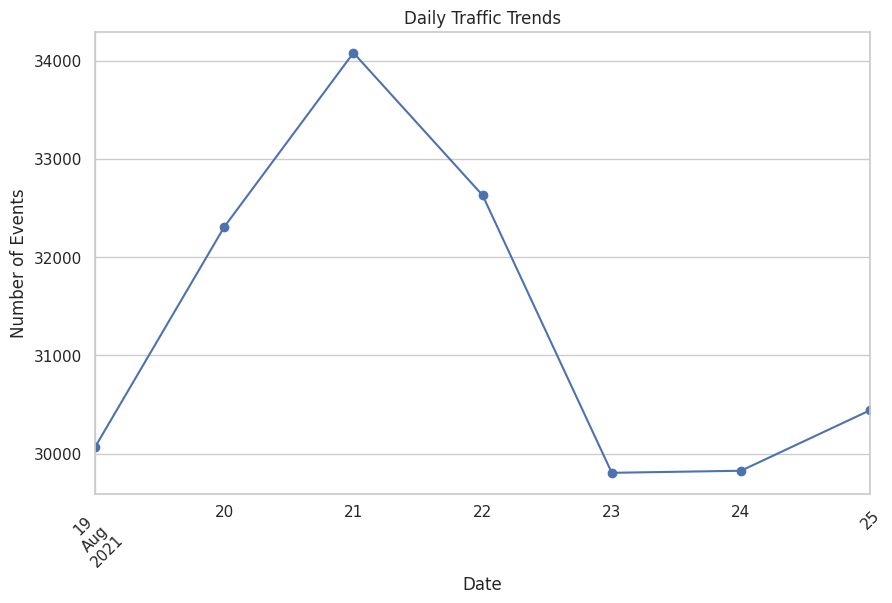

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")

# Visualization 1: Line graph for daily traffic trends
plt.figure(figsize=(10, 6))
daily_traffic.plot(kind='line', marker='o', color='b')
plt.title('Daily Traffic Trends')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



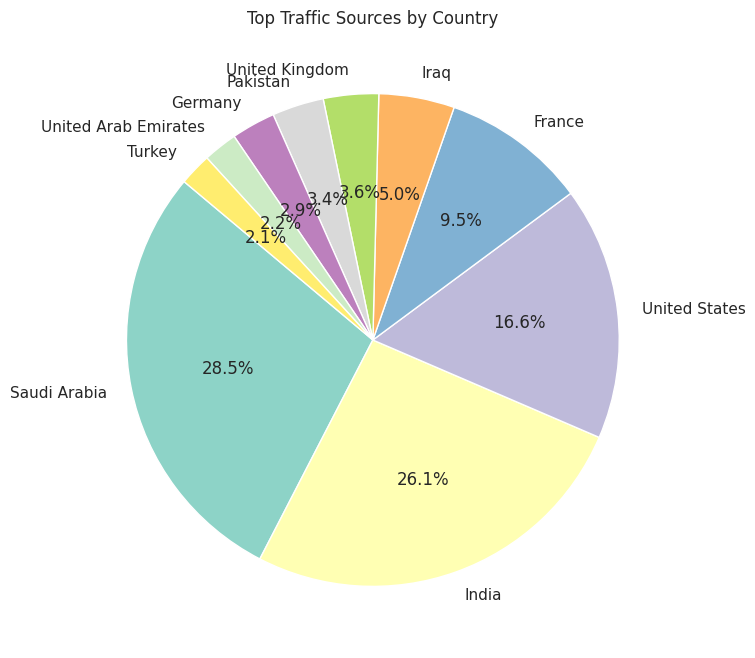

In [18]:
# Visualization 2: Pie chart for traffic sources by country
plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Top Traffic Sources by Country')
plt.ylabel('')  # Hide y-label for clarity in pie chart
plt.show()



<ipython-input-19-846e532eae33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pages.values, y=top_pages.index, palette='viridis')


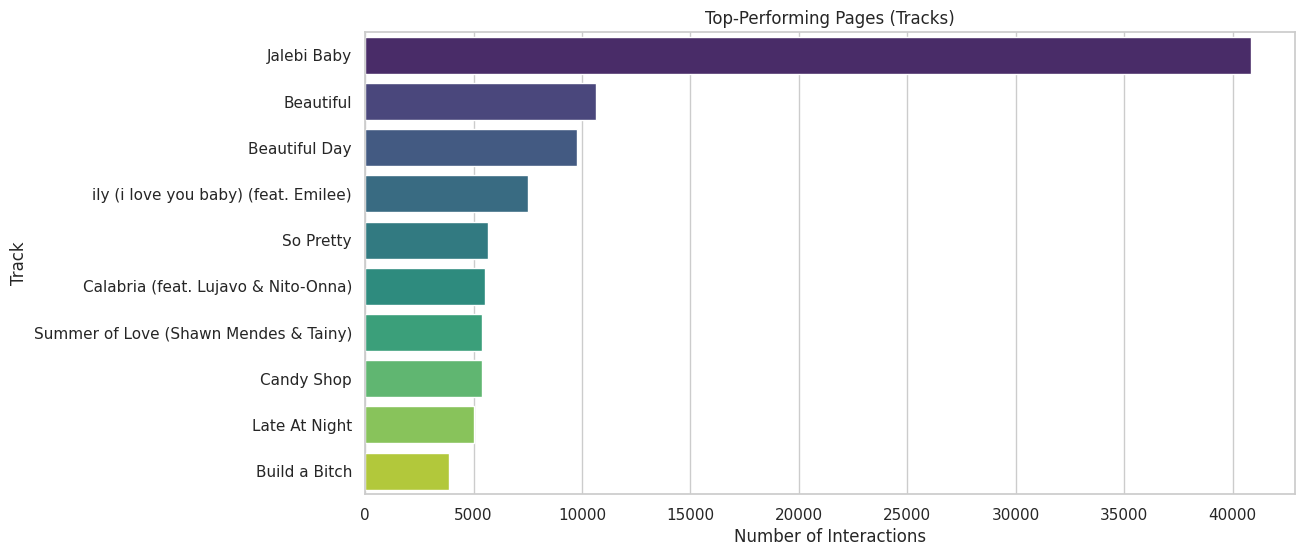

In [19]:
# Visualization 3: Bar chart for top-performing pages (tracks)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pages.values, y=top_pages.index, palette='viridis')
plt.title('Top-Performing Pages (Tracks)')
plt.xlabel('Number of Interactions')
plt.ylabel('Track')
plt.show()
